# Importing Required Library

In [117]:
## import numpy and pandas
import pandas as pd
import numpy as np

## import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## do an inline so that plt.show() is not required everytime
%matplotlib inline

## import for pre-processing
## scale (this is same as standard scalar)
from sklearn.preprocessing import scale
## label encoding
from sklearn.preprocessing import LabelEncoder

## import for model selection:
## splitting data into training and test data (validation set)
from sklearn.model_selection import train_test_split
## import for creating K-folds
from sklearn.model_selection import KFold
## import for CV using folds created
from sklearn.model_selection import cross_val_score
## import for grid search cv for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## for deleting unused variables
import gc

## filter warnings
import os
import warnings
warnings.filterwarnings('ignore')

# Until fuction: line seperator
def print_dashes_and_ln():
    print('-'*100, '\n')
    
# Formatter to display all float format in 2 decimal format
pd.options.display.float_format = '{:.2f}'.format

# Loading data from csv file

In [118]:
# Loading telecom churn data from telecom_churn_data.csv file
telecom_orig = pd.read_csv('telecom_churn_data.csv')
telecom = telecom_orig.copy()
print('Dataframe Shape: ', telecom.shape); print_dashes_and_ln();
telecom.head()

Dataframe Shape:  (99999, 226)
---------------------------------------------------------------------------------------------------- 



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


In [119]:
# Understanding data type, columns, amount, etc
print('Data related Information: ', telecom.info()); print_dashes_and_ln();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
Data related Information:  None
---------------------------------------------------------------------------------------------------- 



After doing analysis on data and understanding business. We may come to understancd that those columns are more important. Whose column name contain rech_amt, rech_data, night_pck, fb_user as substring . So, firstly filling those columns with 0 as new category will help in further manupulation, cleaning and to determine the high value customers.

In [120]:
# let us first extract list of columns containing recharge amount
imp_columns =  telecom.columns[telecom.columns.str.contains('rech_amt|rech_data')]

print(imp_columns);print_dashes_and_ln();

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 



In [121]:
# let us check if there are any missing values for recharge amount
100*telecom.loc[:,imp_columns].isnull().sum()/len(telecom)

total_rech_amt_6            0.00
total_rech_amt_7            0.00
total_rech_amt_8            0.00
total_rech_amt_9            0.00
max_rech_amt_6              0.00
max_rech_amt_7              0.00
max_rech_amt_8              0.00
max_rech_amt_9              0.00
date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
dtype: float64

In [122]:
recharge_amnt_columns_6 = telecom.columns[telecom.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]

telecom.loc[:,recharge_amnt_columns_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.00,99999.00,25153.00,25153.00,25153.00
mean,327.51,104.64,2.46,126.39,192.60
std,398.02,120.61,2.79,108.48,192.65
min,0.00,0.00,1.00,1.00,1.00
25%,109.00,30.00,1.00,25.00,82.00
50%,230.00,110.00,1.00,145.00,154.00
75%,437.50,120.00,3.00,177.00,252.00
max,35190.00,4010.00,61.00,1555.00,7546.00


In [123]:


# let's check if there are any values where total_rech_data is NA and value is present for av_rech_amt_data and vice versa
# check how many av_rech_amt_data_6 is NA
is_invalid_data_6 = telecom['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = telecom['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = telecom['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows for total_rech_data
print(telecom.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(telecom.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(telecom.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# check how many total_rech_data_6 is NA
is_invalid_data_6 = telecom['total_rech_data_6'] == np.nan 
is_invalid_data_7 = telecom['total_rech_data_7'] == np.nan 
is_invalid_data_8 = telecom['total_rech_data_8'] == np.nan 

# check if any value is present for these rows for av_rech_amt_data_6
print(telecom.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(telecom.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(telecom.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())



0.0
0.0
0.0
0.0
0.0
0.0


In [124]:
telecom.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']]= \
telecom.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']].replace(np.NaN,0)

In [125]:
telecom.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']]= \
telecom.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.NaN,0)

In [126]:

# let's add a new derived variable total recharge amount for data: total_rech_amt_data
telecom['total_rech_amt_data_6'] = telecom.av_rech_amt_data_6*telecom.total_rech_data_6
telecom['total_rech_amt_data_7'] = telecom.av_rech_amt_data_7*telecom.total_rech_data_7
telecom['total_rech_amt_data_8'] = telecom.av_rech_amt_data_8*telecom.total_rech_data_8

In [127]:
telecom['total_avg_rech_amnt_good_ph'] = (telecom.total_rech_amt_6 +telecom.total_rech_amt_data_6 \
                                               + telecom.total_rech_amt_7+telecom.total_rech_amt_data_7)/4

In [128]:

# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = telecom.total_avg_rech_amnt_good_ph >= telecom.total_avg_rech_amnt_good_ph.quantile(0.7)



In [129]:
# let us subset out the High Value customers
telecom = telecom.loc[high_value_filter,:]

# let us check how many records remain
len(telecom.loc[high_value_filter,:])

30001

In [130]:
# Now let us label the churned customers
# define a new column in data frame as 'churn' with value as 1 if customer has churned and 0 if customer has not churned
# Initially set all the values as 0
telecom['churn']= 0

In [131]:


# the following columns will be used to find the churned customers in the 9th month 
# total_ic_mou_9, total_ic_mou_9, vol_2g_mb_9 and vol_3g_mb_9
# let's check if any NA/Null values are present
ls_9 = ['total_ic_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
100*telecom.loc[:,ls_9].isnull().sum()/len(telecom)



total_ic_mou_9   0.00
total_ic_mou_9   0.00
vol_2g_mb_9      0.00
vol_3g_mb_9      0.00
dtype: float64

In [132]:


# define is_churned boolean flag for customers where above values are zero
is_churned = (telecom.total_ic_mou_9 == 0) & (telecom.total_ic_mou_9 == 0) & (telecom.vol_2g_mb_9 ==0)& \
(telecom.vol_3g_mb_9 ==0)

# set all such rows fulfilling is_churned condition as 1
telecom.loc[is_churned,'churn']=1

# let us check what's the % of churned customers
100*telecom.churn.sum()/len(is_churned)

8.406386453784874

In [133]:


# let's extract all list of 9th Month (churned month) Columns
month_9_columns =  telecom.columns[telecom.columns.str.contains('_9')]

# drop all columns corresponding to the attributes of churn phase
telecom.drop(month_9_columns,axis=1,inplace=True)

# let's check how many columns remain
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 177 entries, mobile_number to churn
dtypes: float64(140), int64(28), object(9)
memory usage: 40.7+ MB


In [134]:
100*telecom.isnull().sum()/len(telecom.index)

mobile_number                  0.00
circle_id                      0.00
loc_og_t2o_mou                 0.75
std_og_t2o_mou                 0.75
loc_ic_t2o_mou                 0.75
last_date_of_month_6           0.00
last_date_of_month_7           0.09
last_date_of_month_8           0.55
arpu_6                         0.00
arpu_7                         0.00
arpu_8                         0.00
onnet_mou_6                    1.82
onnet_mou_7                    1.79
onnet_mou_8                    3.91
offnet_mou_6                   1.82
offnet_mou_7                   1.79
offnet_mou_8                   3.91
roam_ic_mou_6                  1.82
roam_ic_mou_7                  1.79
roam_ic_mou_8                  3.91
roam_og_mou_6                  1.82
roam_og_mou_7                  1.79
roam_og_mou_8                  3.91
loc_og_t2t_mou_6               1.82
loc_og_t2t_mou_7               1.79
loc_og_t2t_mou_8               3.91
loc_og_t2m_mou_6               1.82
loc_og_t2m_mou_7            

In [135]:
# create function to anlyze the features across 6th, 7th and 8th month
def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": telecom[telecom["churn"] == churn][cols[6]].mean(),
        "mean_7": telecom[telecom["churn"] == churn][cols[7]].mean(),
        "mean_8": telecom[telecom["churn"] == churn][cols[8]].mean(),
        "std_6": telecom[telecom["churn"] == churn][cols[6]].std(),
        "std_7": telecom[telecom["churn"] == churn][cols[7]].std(),
        "std_8": telecom[telecom["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=telecom, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=telecom, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=telecom, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)



In [136]:


#let's again extract the recharge amount related columns
recharge_amnt_columns =  telecom.columns[telecom.columns.str.contains('rech_amt')]

recharge_amnt_columns



Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8'],
      dtype='object')

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,649.56,663.82,614.54,548.02,574.33,615.19
Churned,782.50,624.30,255.57,675.28,663.40,450.55


<Figure size 1224x504 with 0 Axes>

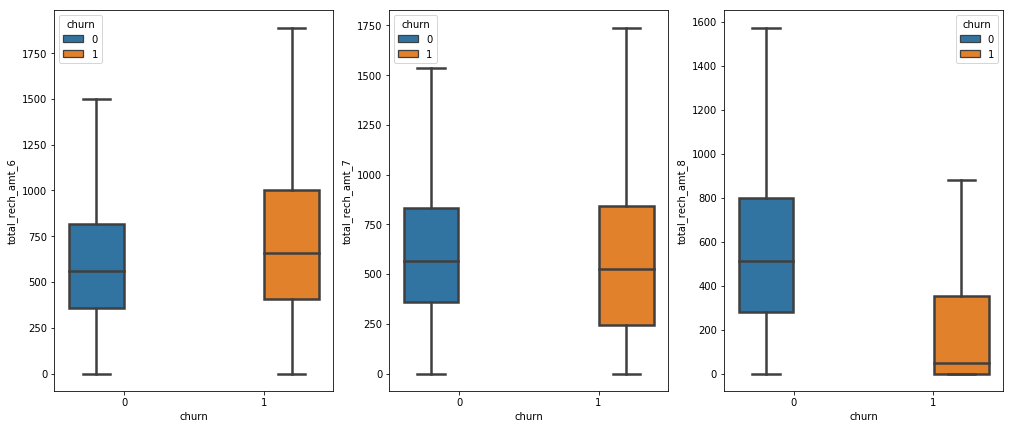

In [137]:
# let's analyze total recharge amount:
analyze_feature('total_rech_amt')

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_data_6', 7: 'total_rech_amt_data_7', 8: 'total_rech_amt_data_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,460.70,545.73,498.19,1447.90,1500.10,1685.29
Churned,402.12,337.63,82.54,1047.33,1165.83,470.96


<Figure size 1224x504 with 0 Axes>

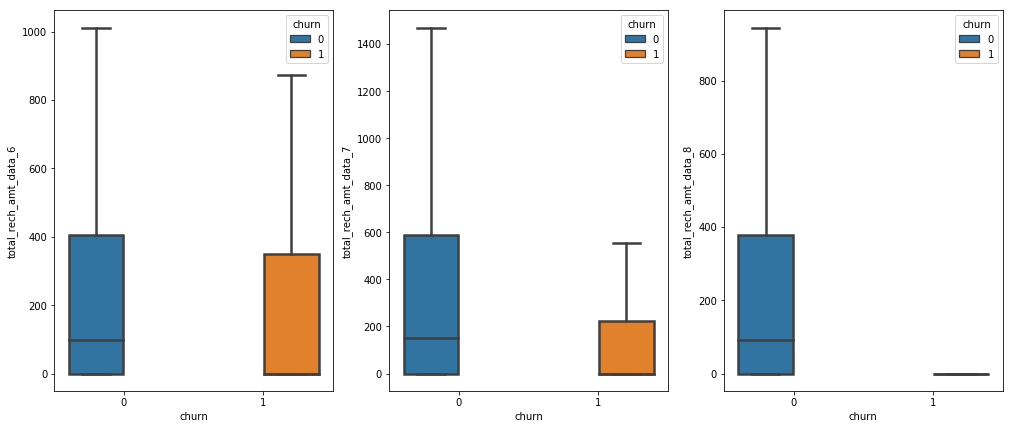

In [138]:
# let's analyze total recharge amount for data:
analyze_feature('total_rech_amt_data')

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,168.85,173.23,166.78,171.50,176.37,170.97
Churned,173.98,161.00,87.89,212.49,228.85,180.84


<Figure size 1224x504 with 0 Axes>

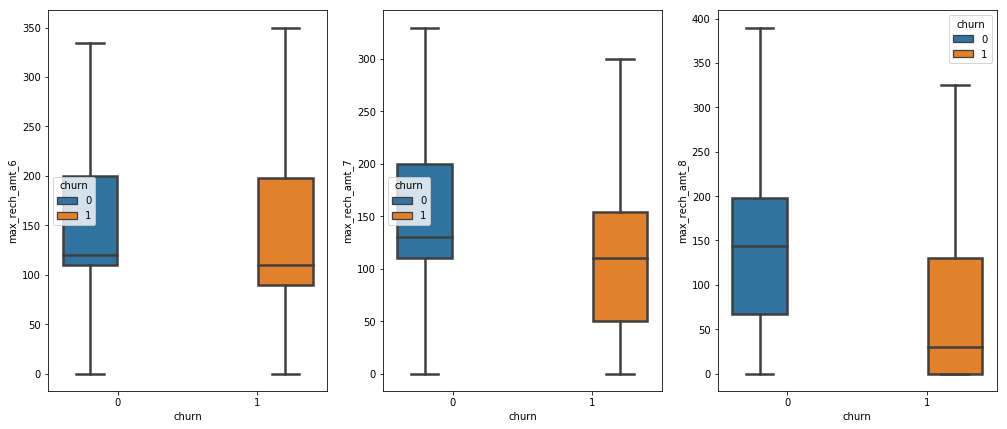

In [139]:


# let's analyze maximum recharge amount for data:
analyze_feature('max_rech_amt')



In [140]:
# drop av_rech_amt_data and total_rech_data columns as total_rech_amt_data derived using these columns.
telecom.drop(['av_rech_amt_data_6','av_rech_amt_data_7'
                   ,'av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis=1,inplace=True)

In [141]:
# Let us define 3 new derived columns
# total recharge amount for good phase: total_rech_amt_good_ph
# total recharge amount data for good phase: total_rech_amt_data_good_ph
# max recharge amount for good phase: max_rech_amt_good_ph

telecom['total_rech_amt_good_ph'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_7)/2
telecom['total_rech_amt_data_good_ph'] = (telecom.total_rech_amt_data_6 + telecom.total_rech_amt_data_7)/2
telecom['max_rech_amt_good_ph'] = (telecom.max_rech_amt_6 + telecom.max_rech_amt_7)/2

# drop the original columns as these are not longer required
telecom.drop(['total_rech_amt_6','total_rech_amt_7'
              ,'max_rech_amt_6','max_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7'],axis=1,inplace=True)

# also drop total_avg_rech_amnt_good_ph as we are using the component columns defined above
telecom.drop('total_avg_rech_amnt_good_ph',axis=1,inplace=True)

Churn Stats (mean and standard deviation):
{6: 'last_day_rch_amt_6', 7: 'last_day_rch_amt_7', 8: 'last_day_rch_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,100.36,102.08,97.35,140.19,138.95,145.09
Churned,106.67,81.52,38.43,177.76,159.67,134.92


<Figure size 1224x504 with 0 Axes>

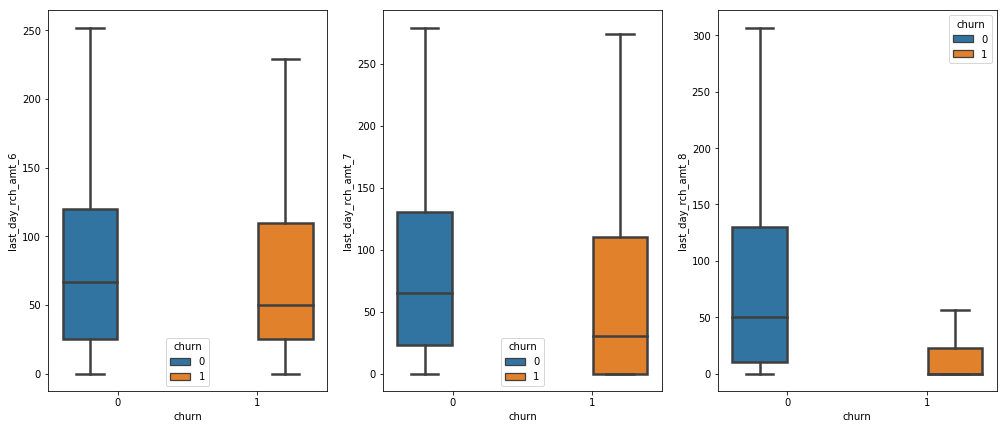

In [142]:
#let's extract the last day recharge amount columns
last_day_rech_amt = telecom.columns[telecom.columns.str.contains('day')]



# let's check the mean variation in last day recharge for churned and non churned customers
analyze_feature('last_day_rch_amt')



In [143]:
# Let us define new derived column
# last day recharge amount for good phase: last_day_rch_amt_good_ph
telecom['last_day_rch_amt_good_ph'] = (telecom.last_day_rch_amt_6 + telecom.last_day_rch_amt_7)/2

# drop the original columns as these are not longer required
telecom.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)

# Let's check other recharge related variables:
ls_recharge = telecom.columns[telecom.columns.str.contains('rech_num|max_rech_data',regex=True)]

# lets check the % of NA values for recharge related variables
100*telecom.loc[:,ls_recharge].isnull().sum()/len(telecom)

total_rech_num_6    0.00
total_rech_num_7    0.00
total_rech_num_8    0.00
max_rech_data_6    44.15
max_rech_data_7    43.15
max_rech_data_8    46.83
dtype: float64

In [144]:
# let's check the distribution for max_rech_data
telecom.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16756.00,17057.00,15953.00
mean,139.80,140.43,136.33
std,118.85,120.25,119.53
min,1.00,1.00,1.00
25%,25.00,25.00,25.00
50%,152.00,152.00,152.00
75%,198.00,198.00,198.00
max,1555.00,1555.00,1555.00


In [145]:
telecom.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= telecom.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)
# Let us define new derived column
# maximum recharge for data for good phase: max_rech_data_good_ph
telecom['max_rech_data_good_ph'] = (telecom.max_rech_data_6 + telecom.max_rech_data_7)/2

# drop the original columns as these are not longer required
telecom.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

# let's check total recharge number
ls_tot_recharge_num = telecom.columns[telecom.columns.str.contains('total_rech_num')]

# check the summary stats:
print(telecom.loc[:,ls_tot_recharge_num].describe())

# let's check the median variation in total recharge numbers for churned and non churned customers
pd.DataFrame([telecom.loc[telecom.churn==0,ls_tot_recharge_num].median()
              ,telecom.loc[telecom.churn==1,ls_tot_recharge_num].median()],index={'Non Churned','Churned'})

       total_rech_num_6  total_rech_num_7  total_rech_num_8
count          30001.00          30001.00          30001.00
mean              11.85             11.72              9.97
std                9.43              9.43              9.27
min                0.00              0.00              0.00
25%                6.00              6.00              4.00
50%                9.00              9.00              8.00
75%               15.00             15.00             13.00
max              307.00            138.00            196.00


,total_rech_num_6,total_rech_num_7,total_rech_num_8
Non Churned,9.00,9.00,8.00
Churned,11.00,9.00,3.00


In [146]:
# Let us define new derived column
# total recharge number for good phase: total_rech_num_good_ph
telecom['total_rech_num_good_ph'] = (telecom.total_rech_num_6 + telecom.total_rech_num_7)/2

# drop the original columns as these are not longer required
telecom.drop(['total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

In [147]:
#let's extract the 2G and 3G usage related columns
typ_2g_or_3g = telecom.columns[telecom.columns.str.contains('2g|3g',regex=True)]

In [148]:
#let us check the % of NA values present
telecom.loc[:,typ_2g_or_3g].isnull().sum()/len(telecom.loc[:,typ_2g_or_3g])

count_rech_2g_6   0.44
count_rech_2g_7   0.43
count_rech_2g_8   0.47
count_rech_3g_6   0.44
count_rech_3g_7   0.43
count_rech_3g_8   0.47
vol_2g_mb_6       0.00
vol_2g_mb_7       0.00
vol_2g_mb_8       0.00
vol_3g_mb_6       0.00
vol_3g_mb_7       0.00
vol_3g_mb_8       0.00
arpu_3g_6         0.44
arpu_3g_7         0.43
arpu_3g_8         0.47
arpu_2g_6         0.44
arpu_2g_7         0.43
arpu_2g_8         0.47
monthly_2g_6      0.00
monthly_2g_7      0.00
monthly_2g_8      0.00
sachet_2g_6       0.00
sachet_2g_7       0.00
sachet_2g_8       0.00
monthly_3g_6      0.00
monthly_3g_7      0.00
monthly_3g_8      0.00
sachet_3g_6       0.00
sachet_3g_7       0.00
sachet_3g_8       0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
dtype: float64

In [149]:
telecom.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)


# let's extract volume of 2G and 3G usage columns
volume_of_usage_3g_and_2g = telecom.columns[telecom.columns.str.contains('vol_2g|vol_3g',regex=True)]

# let's check the summary stats:
print(telecom.loc[:,volume_of_usage_3g_and_2g].describe())



       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  \
count     30001.00     30001.00     30001.00     30001.00     30001.00   
mean        126.52       125.10       105.91       344.26       370.20   
std         330.53       331.55       313.38       913.75       915.53   
min           0.00         0.00         0.00         0.00         0.00   
25%           0.00         0.00         0.00         0.00         0.00   
50%           0.00         0.05         0.00         0.00         0.00   
75%          83.45        77.77        51.65       358.74       410.70   
max       10285.90      7873.55     11117.61     45735.40     28144.12   

       vol_3g_mb_8  
count     30001.00  
mean        351.49  
std         919.02  
min           0.00  
25%           0.00  
50%           0.00  
75%         356.19  
max       30036.06  


In [150]:
# let's check the mean variation in volume of 2G/3G usage for churned and non churned customers
pd.DataFrame([telecom.loc[telecom.churn==0,volume_of_usage_3g_and_2g].mean()
              ,telecom.loc[telecom.churn==1,volume_of_usage_3g_and_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Non Churned,128.07,128.46,113.56,350.31,384.20,375.78
Churned,109.60,88.41,22.56,278.30,217.62,86.92


In [151]:
# Let us define two new derived columns
# 2G volume usage for good phase: vol_2g_mb_good_ph
# 3G volume usage for good phase: vol_3g_mb_good_ph
telecom['vol_2g_mb_good_ph'] = (telecom.vol_2g_mb_6 + telecom.vol_2g_mb_7)/2
telecom['vol_3g_mb_good_ph'] = (telecom.vol_3g_mb_6 + telecom.vol_3g_mb_7)/2

# drop the original columns as these are not longer required
telecom.drop(['vol_2g_mb_6','vol_2g_mb_7'
              ,'vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)



In [152]:
# let's check monthly 2G/3G service schemes
monthly_2g_3g = telecom.columns[telecom.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

# let's check the summary stats:
print(telecom.loc[:,monthly_2g_3g].describe())

       monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_7  \
count      30001.00      30001.00      30001.00      30001.00      30001.00   
mean           0.17          0.18          0.15          0.22          0.23   
std            0.43          0.45          0.41          0.61          0.66   
min            0.00          0.00          0.00          0.00          0.00   
25%            0.00          0.00          0.00          0.00          0.00   
50%            0.00          0.00          0.00          0.00          0.00   
75%            0.00          0.00          0.00          0.00          0.00   
max            4.00          5.00          5.00         14.00         16.00   

       monthly_3g_8  
count      30001.00  
mean           0.21  
std            0.62  
min            0.00  
25%            0.00  
50%            0.00  
75%            0.00  
max           16.00  


In [153]:
# let's check the mean variation in monthly schemes of 2G/3G usage for churned and non churned customers
pd.DataFrame([telecom.loc[telecom.churn==0,monthly_2g_3g].mean()
              ,telecom.loc[telecom.churn==1,monthly_2g_3g].mean()],index={'Non Churned','Churned'})

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churned,0.18,0.19,0.17,0.22,0.24,0.23
Churned,0.09,0.07,0.02,0.19,0.14,0.06


In [154]:


# Let us define two new derived columns
# 2G monthly for good phase: monthly_2g_good_ph
# 3G monthly for good phase: monthly_3g_good_ph
telecom['monthly_2g_good_ph'] = (telecom.monthly_2g_6 + telecom.monthly_2g_7)/2
telecom['monthly_3g_good_ph'] = (telecom.monthly_3g_6 + telecom.monthly_3g_7)/2

# drop the original columns as these are not longer required
telecom.drop(['monthly_2g_6','monthly_2g_7'
              ,'monthly_3g_6','monthly_3g_7'],axis=1,inplace=True)



Churn Stats (mean and standard deviation):
{6: 'vbc_3g_6', 7: 'vbc_3g_7', 8: 'vbc_3g_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,162.62,186.49,180.93,421.60,452.97,433.33
Churned,113.95,95.86,40.64,356.49,311.75,210.34


<Figure size 1224x504 with 0 Axes>

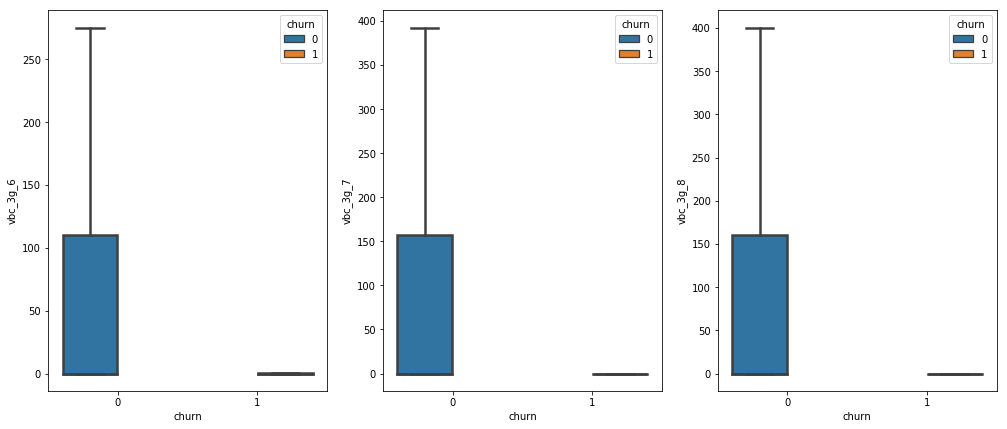

In [155]:
# let us rename month named vbc columns to 6,7,8,9 format
telecom.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
telecom.drop('vbc_3g_9',axis=1,inplace=True)

# let's check the volumne based cost for 3G
volumn_based_cost_3g = telecom.columns[telecom.columns.str.contains('vbc_3g')]

# analyze volume based cost
analyze_feature('vbc_3g')

In [156]:


# Let us define new derived columns
# 3g volume based cost for good phase: vbc_3g_good_ph
telecom['vbc_3g_good_ph'] = (telecom['vbc_3g_6'] + telecom['vbc_3g_7'])/2

# drop the original columns as these are not longer required
telecom.drop(['vbc_3g_6','vbc_3g_7'],axis=1,inplace=True)



In [157]:
# let's check sachet subscription for 2G/3G
sachet_2g_or_3g = telecom.columns[telecom.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

print(telecom.loc[:,sachet_2g_or_3g].describe())

pd.DataFrame([telecom.loc[telecom.churn==0,sachet_2g_or_3g].mean()
              ,telecom.loc[telecom.churn==1,sachet_2g_or_3g].mean()],index={'Non Churned','Churned'})

       sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_3g_6  sachet_3g_7  \
count     30001.00     30001.00     30001.00     30001.00     30001.00   
mean          1.07         1.21         1.05         0.21         0.23   
std           2.51         2.74         2.54         0.99         1.09   
min           0.00         0.00         0.00         0.00         0.00   
25%           0.00         0.00         0.00         0.00         0.00   
50%           0.00         0.00         0.00         0.00         0.00   
75%           1.00         1.00         1.00         0.00         0.00   
max          42.00        48.00        44.00        29.00        35.00   

       sachet_3g_8  
count     30001.00  
mean          0.20  
std           1.10  
min           0.00  
25%           0.00  
50%           0.00  
75%           0.00  
max          41.00  


,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churned,1.07,1.24,1.13,0.21,0.23,0.22
Churned,1.03,0.88,0.27,0.24,0.22,0.06


In [158]:
# Let us define two new derived columns
# 2G sachet for good phase: sachet_2g_good_ph
# 3G sachet for good phase: sachet_3g_good_ph
telecom['sachet_2g_good_ph'] = (telecom.sachet_2g_6 + telecom.sachet_2g_7)/2
telecom['sachet_3g_good_ph'] = (telecom.sachet_3g_6 + telecom.sachet_3g_7)/2

# drop the original columns as these are not longer required
telecom.drop(['sachet_2g_6','sachet_2g_7'
              ,'sachet_3g_6','sachet_3g_7'],axis=1,inplace=True)

859.3049167327517
1241.4973252301759


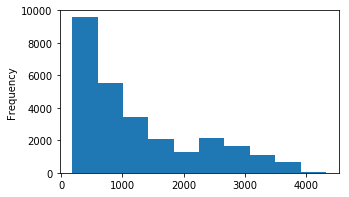

In [159]:


# let's check the age on n/w for churned and non churned customers
print(telecom.loc[telecom.churn==1,'aon'].mean())
print(telecom.loc[telecom.churn==0,'aon'].mean())

# let's check the age distribution for non churned customers
plt.figure(figsize=(5,3))
telecom.loc[telecom.churn==0,'aon'].plot.hist()

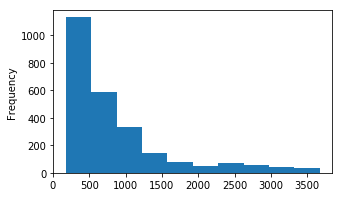

In [160]:
# let's check the age distribution for churned customers
plt.figure(figsize=(5,3))
telecom.loc[telecom.churn==1,'aon'].plot.hist()

In [161]:
# let's check the circle id values
telecom.circle_id.unique()

# let's drop this column as there is only one circle id
telecom.drop('circle_id',inplace=True,axis=1)

In [162]:
# extract the date columns
date_columns = telecom.columns[telecom.columns.str.contains('date')]

# convert to datetime
for date_col in list(date_columns):
    telecom[date_col]= pd.to_datetime(telecom[date_col])

In [163]:
print(telecom.last_date_of_month_6.dt.day.unique(),telecom.last_date_of_month_7.dt.day.unique()
      ,telecom.last_date_of_month_8.dt.day.unique())

# as only 1 unique value last day of month is present these columns are not adding much information
# let us drop the columns
telecom.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

[30] [31. nan] [31. nan]


In [164]:
# let's extract the day of last recharge
telecom['day_of_last_rech_6'] =  telecom.date_of_last_rech_6.dt.day
telecom['day_of_last_rech_7'] =  telecom.date_of_last_rech_7.dt.day
telecom['day_of_last_rech_8'] =  telecom.date_of_last_rech_8.dt.day

dt_of_last_rech_cols = ['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8']

pd.DataFrame([telecom.loc[telecom.churn==0,dt_of_last_rech_cols].median()
              ,telecom.loc[telecom.churn==1,dt_of_last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
Non Churned,28.00,29.00,29.00
Churned,28.00,27.00,26.00


In [165]:
# let's define a new derived column indicating the shift in day of last recharge

telecom['day_of_last_rech_shift'] = telecom.day_of_last_rech_8 -(telecom.day_of_last_rech_6+telecom.day_of_last_rech_7)/2

# Data Cleaning and Filling missing value

### Treating all Categorical Variables

In [166]:
#1. Data Cleaning. ## Replacing Columns values with -1 as new category when > 70% Null Values
#print('Total number of missing values in the DataFrame: ', telecom.isnull().values.sum());print_dashes_and_ln();
#print('Checking percentage the column-wise distribution of null values: ', round(100*(telecom.isnull().sum()/len(telecom.index)), 2));print_dashes_and_ln();
#categorical_vars = list(categorical_vars[categorical_vars.values>=0.7].index)
#print('The columns that need to replace with new category as -1: ', colnames);print_dashes_and_ln();
# Missing values can be imputed with '-1' 
# where -1 can be treated as a new category.
#for var in categorical_vars:
#    telecom[var].fillna(value=-1, inplace=True)
    
    
#1. Data Cleaning. Removing Columns with > 70% Null Values
colnames = (telecom.isnull().sum()/len(telecom))
colnames = list(colnames[colnames.values>=0.7].index)
telecom.drop(labels = colnames,axis =1,inplace=True)
print("Number of Columns dropped\t: ",len(colnames));print_dashes_and_ln();

Number of Columns dropped	:  0
---------------------------------------------------------------------------------------------------- 



In [167]:
#2. Data Cleaning. ## Removing Columns with single Unique Value
unique = telecom.nunique()
unique = unique[unique.values == 1]
telecom.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",telecom.shape ,"rows & columns."); print_dashes_and_ln();

So now we are left with (30001, 135) rows & columns.
---------------------------------------------------------------------------------------------------- 



In [168]:
#3. Columns by Data Type
non_numeric_columns = telecom.select_dtypes(['object']).columns
numeric_columns = telecom.select_dtypes(['number']).columns
print("Numeric \t: ",numeric_columns); print_dashes_and_ln();
print("Non-numeric Columns \t: ",non_numeric_columns); print_dashes_and_ln();



Numeric 	:  Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'vol_3g_mb_good_ph', 'monthly_2g_good_ph', 'monthly_3g_good_ph',
       'vbc_3g_good_ph', 'sachet_2g_good_ph', 'sachet_3g_good_ph',
       'day_of_last_rech_6', 'day_of_last_rech_7', 'day_of_last_rech_8',
       'day_of_last_rech_shift'],
      dtype='object', length=129)
---------------------------------------------------------------------------------------------------- 

Non-numeric Columns 	:  Index([], dtype='object')
---------------------------------------------------------------------------------------------------- 



In [169]:

##Treating all non numerical columns or Categorical Variables

There are 12 of them and all of these have more than 70% missing values. Missing values can be imputed with '-1' where -1 can be treated as a new category.

CATEGORICAL VARIABLES:

    night_pck_user_6
    night_pck_user_7
    night_pck_user_8
    night_pck_user_9
    fb_user_6
    fb_user_7
    fb_user_8
    fb_user_9



SyntaxError: invalid syntax (<ipython-input-169-4a581bf20bab>, line 4)

# Data Preparation

## 1. Derive new features
There are some importance variable which must have missing value. So, first lets create a new category.